In [54]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler, OrdinalEncoder
from sklearn.model_selection import StratifiedShuffleSplit

In [4]:
# Load data
data = pd.read_excel('../data/data.xlsx')
data

,sequence,Episode 1,ID Episode 1,Runtime Episode 1,Time period Episode 1,Genres Episode 1,Rating Episode 1,Episode 2,ID Episode 2,Runtime Episode 2,...,Episode 8,ID Episode 8,Runtime Episode 8,Time period Episode 8,Genres Episode 8,Rating Episode 8,drama label,thriller label,action label,max_label
0,1806,Pink,4069937,56m,6 Months After the Heist,"{'drama': 0.41, 'thriller': 0.32, 'action': 0.27}",7.5,Red,4069936,36m,...,White,4069938,48m,The Heist,"{'drama': 0.0, 'thriller': 0.48, 'action': 0.52}",7.4,0.2078,0.5033,0.2889,thriller
1,9254,Yellow,3483983,49m,6 Weeks Before the Heist,"{'drama': 0.13, 'thriller': 0.39, 'action': 0.48}",7.0,Pink,4069937,56m,...,White,4069938,48m,The Heist,"{'drama': 0.0, 'thriller': 0.48, 'action': 0.52}",7.4,0.1773,0.4173,0.4055,thriller
2,31441,Orange,4069935,52m,3 Weeks Before the Heist,"{'drama': 0.71, 'thriller': 0.14, 'action': 0.14}",7.1,Yellow,3483983,49m,...,Blue,4069266,48m,5 Days Before the Heist,"{'drama': 0.38, 'thriller': 0.43, 'action': 0.19}",7.2,0.2683,0.3617,0.3700,action
3,18465,Blue,4069266,48m,5 Days Before the Heist,"{'drama': 0.56, 'thriller': 0.33, 'action': 0.11}",7.2,Red,4069936,36m,...,Orange,4069935,52m,3 Weeks Before the Heist,"{'drama': 0.6, 'thriller': 0.25, 'action': 0.15}",7.1,0.3157,0.4386,0.2458,thriller
4,34383,Violet,4069934,49m,24 Years Before the Heist,"{'drama': 0.71, 'thriller': 0.1, 'action': 0.19}",7.5,Red,4069936,36m,...,Orange,4069935,52m,3 Weeks Before the Heist,"{'drama': 0.6, 'thriller': 0.25, 'action': 0.15}",7.1,0.3888,0.2875,0.3238,drama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30315,27756,Yellow,3483983,49m,6 Weeks Before the Heist,"{'drama': 0.13, 'thriller': 0.39, 'action': 0.48}",7.0,Blue,4069266,48m,...,Orange,4069935,52m,3 Weeks Before the Heist,"{'drama': 0.6, 'thriller': 0.25, 'action': 0.15}",7.1,0.2596,0.3677,0.3727,action
30316,30759,Orange,4069935,52m,3 Weeks Before the Heist,"{'drama': 0.71, 'thriller': 0.14, 'action': 0.14}",7.1,Green,3485676,46m,...,Yellow,3483983,49m,6 Weeks Before the Heist,"{'drama': 0.13, 'thriller': 0.39, 'action': 0.48}",7.0,0.3113,0.4394,0.2492,thriller
30317,823,Orange,4069935,52m,3 Weeks Before the Heist,"{'drama': 0.71, 'thriller': 0.14, 'action': 0.14}",7.1,Green,3485676,46m,...,Violet,4069934,49m,24 Years Before the Heist,"{'drama': 0.52, 'thriller': 0.24, 'action': 0.24}",7.5,0.3113,0.4474,0.2412,thriller
30318,36432,Orange,4069935,52m,3 Weeks Before the Heist,"{'drama': 0.71, 'thriller': 0.14, 'action': 0.14}",7.1,Green,3485676,46m,...,Pink,4069937,56m,6 Months After the Heist,"{'drama': 0.55, 'thriller': 0.2, 'action': 0.25}",7.5,0.4168,0.2891,0.2941,drama


In [5]:
# Drop unnesessary columns
rating_columns = [col for col in data.columns if col.startswith("Rating")]
runtime_columns = [col for col in data.columns if col.startswith("Runtime")]
id_columns = [col for col in data.columns if col.startswith("ID")]
sequence_column = ['sequence']
percent_labels_columns = ['drama label', 'thriller label', 'action label']

cols_to_drop = rating_columns + id_columns + sequence_column + runtime_columns + percent_labels_columns

data = data.drop(columns=cols_to_drop, axis=1)
data.head()

,Episode 1,Time period Episode 1,Genres Episode 1,Episode 2,Time period Episode 2,Genres Episode 2,Episode 3,Time period Episode 3,Genres Episode 3,Episode 4,...,Episode 6,Time period Episode 6,Genres Episode 6,Episode 7,Time period Episode 7,Genres Episode 7,Episode 8,Time period Episode 8,Genres Episode 8,max_label
0,Pink,6 Months After the Heist,"{'drama': 0.41, 'thriller': 0.32, 'action': 0.27}",Red,The Morning After the Heist,"{'drama': 0.22, 'thriller': 0.39, 'action': 0.39}",Violet,24 Years Before the Heist,"{'drama': 0.62, 'thriller': 0.14, 'action': 0.24}",Green,...,Blue,5 Days Before the Heist,"{'drama': 0.45, 'thriller': 0.4, 'action': 0.15}",Yellow,6 Weeks Before the Heist,"{'drama': 0.14, 'thriller': 0.36, 'action': 0.5}",White,The Heist,"{'drama': 0.0, 'thriller': 0.48, 'action': 0.52}",thriller
1,Yellow,6 Weeks Before the Heist,"{'drama': 0.13, 'thriller': 0.39, 'action': 0.48}",Pink,6 Months After the Heist,"{'drama': 0.43, 'thriller': 0.33, 'action': 0.24}",Green,7 Years Before the Heist,"{'drama': 0.48, 'thriller': 0.19, 'action': 0.33}",Violet,...,Red,The Morning After the Heist,"{'drama': 0.3, 'thriller': 0.35, 'action': 0.35}",Blue,5 Days Before the Heist,"{'drama': 0.37, 'thriller': 0.42, 'action': 0.21}",White,The Heist,"{'drama': 0.0, 'thriller': 0.48, 'action': 0.52}",thriller
2,Orange,3 Weeks Before the Heist,"{'drama': 0.71, 'thriller': 0.14, 'action': 0.14}",Yellow,6 Weeks Before the Heist,"{'drama': 0.14, 'thriller': 0.38, 'action': 0.48}",Green,7 Years Before the Heist,"{'drama': 0.48, 'thriller': 0.19, 'action': 0.33}",White,...,Red,The Morning After the Heist,"{'drama': 0.3, 'thriller': 0.35, 'action': 0.35}",Violet,24 Years Before the Heist,"{'drama': 0.57, 'thriller': 0.22, 'action': 0.22}",Blue,5 Days Before the Heist,"{'drama': 0.38, 'thriller': 0.43, 'action': 0.19}",action
3,Blue,5 Days Before the Heist,"{'drama': 0.56, 'thriller': 0.33, 'action': 0.11}",Red,The Morning After the Heist,"{'drama': 0.22, 'thriller': 0.39, 'action': 0.39}",White,The Heist,"{'drama': 0.14, 'thriller': 0.38, 'action': 0.48}",Green,...,Yellow,6 Weeks Before the Heist,"{'drama': 0.14, 'thriller': 0.38, 'action': 0.48}",Violet,24 Years Before the Heist,"{'drama': 0.57, 'thriller': 0.22, 'action': 0.22}",Orange,3 Weeks Before the Heist,"{'drama': 0.6, 'thriller': 0.25, 'action': 0.15}",thriller
4,Violet,24 Years Before the Heist,"{'drama': 0.71, 'thriller': 0.1, 'action': 0.19}",Red,The Morning After the Heist,"{'drama': 0.22, 'thriller': 0.39, 'action': 0.39}",Yellow,6 Weeks Before the Heist,"{'drama': 0.09, 'thriller': 0.36, 'action': 0.55}",White,...,Green,7 Years Before the Heist,"{'drama': 0.4, 'thriller': 0.25, 'action': 0.35}",Pink,6 Months After the Heist,"{'drama': 0.52, 'thriller': 0.19, 'action': 0.29}",Orange,3 Weeks Before the Heist,"{'drama': 0.6, 'thriller': 0.25, 'action': 0.15}",drama


# Splitting the data

In [6]:
# Split the data into 70% training, 15% validation, and 15% testing
train_size = 0.7
val_size = 0.15
test_size = 0.15

train_val_split = StratifiedShuffleSplit(n_splits=1, test_size=val_size + test_size, random_state=42)
for train_index, val_test_index in train_val_split.split(data, data['max_label']):
    training_set = data.loc[train_index]
    val_test_set = data.loc[val_test_index]

# Reset the index for strat_val_test_set before the next split
val_test_set = val_test_set.reset_index(drop=True)

# Split the 'strat_val_test_set' into validation and test sets
val_test_split = StratifiedShuffleSplit(n_splits=1, test_size=test_size / (val_size + test_size), random_state=42)
for val_index, test_index in val_test_split.split(val_test_set, val_test_set['max_label']):
    validation_set = val_test_set.loc[val_index]
    test_set = val_test_set.loc[test_index]

In [7]:
# Verify the final splits
print(f"Training set shape: {training_set.shape}")
print(f"Validation set shape: {validation_set.shape}")
print(f"Testing set shape: {test_set.shape}")

Training set shape: (21224, 25)
Validation set shape: (4548, 25)
Testing set shape: (4548, 25)


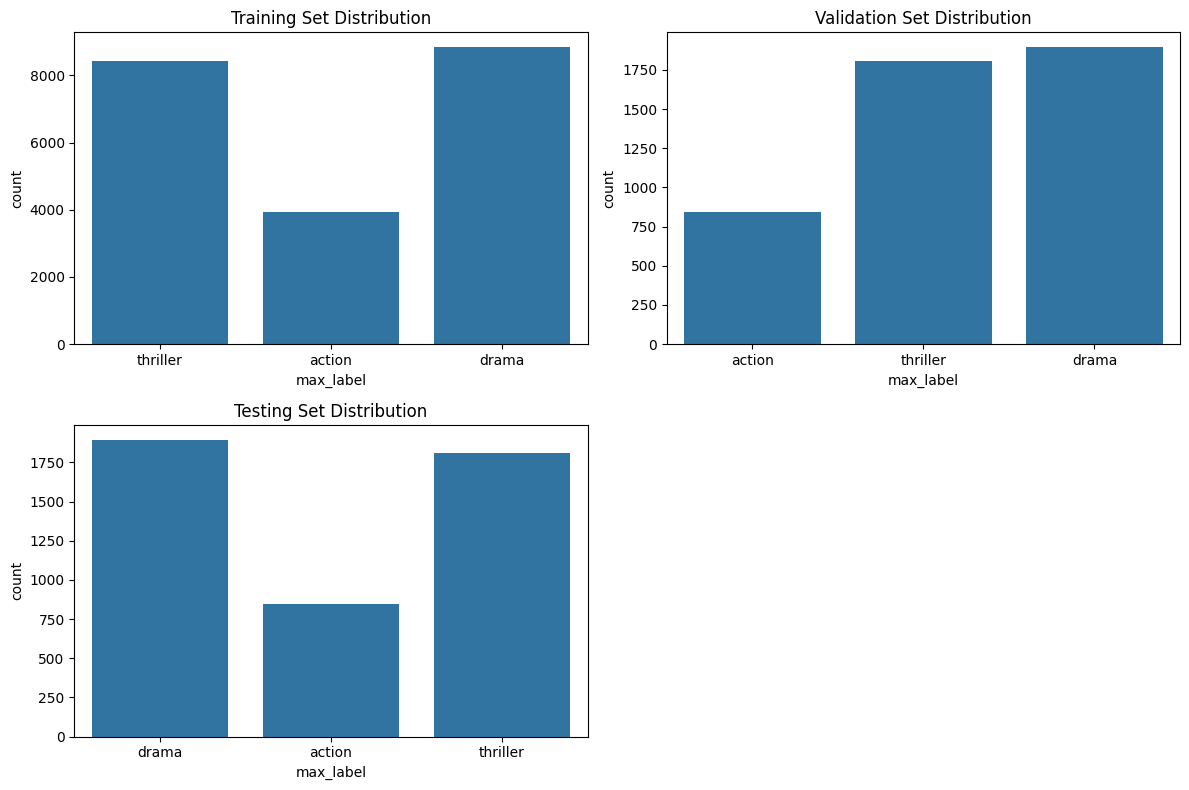

In [8]:
# Plotting the distribution of target labels in each dataset
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.countplot(x='max_label', data=training_set)
plt.title("Training Set Distribution")

plt.subplot(2, 2, 2)
sns.countplot(x='max_label', data=validation_set)
plt.title("Validation Set Distribution")

plt.subplot(2, 2, 3)
sns.countplot(x='max_label', data=test_set)
plt.title("Testing Set Distribution")

plt.tight_layout()
plt.show()

In [9]:
# Check overlap (should be empty)
overlap = set(training_set).intersection(set(test_set.index))
print("Overlap between train and test sets:", overlap)

Overlap between train and test sets: set()


In [10]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21224 entries, 24155 to 19423
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Episode 1              21224 non-null  object
 1   Time period Episode 1  21224 non-null  object
 2   Genres Episode 1       21224 non-null  object
 3   Episode 2              21224 non-null  object
 4   Time period Episode 2  21224 non-null  object
 5   Genres Episode 2       21224 non-null  object
 6   Episode 3              21224 non-null  object
 7   Time period Episode 3  21224 non-null  object
 8   Genres Episode 3       21224 non-null  object
 9   Episode 4              21224 non-null  object
 10  Time period Episode 4  21224 non-null  object
 11  Genres Episode 4       21224 non-null  object
 12  Episode 5              21224 non-null  object
 13  Time period Episode 5  21224 non-null  object
 14  Genres Episode 5       21224 non-null  object
 15  Episode 6           

# Transforming data into numerical values

### Custom Transformers

In [11]:
from transformers import GenresTransformer, TimePeriodTransformer

In [12]:
# Custom transformer for Genre columns

# Columns to transform
genres_columns = [f'Genres Episode {i}' for i in range(1, 9)]

# Instantiate the transformer
genres_transformer = GenresTransformer(columns=genres_columns)

# Apply the transformer to your data
training_set = genres_transformer.fit_transform(training_set)
validation_set = genres_transformer.transform(validation_set)
test_set = genres_transformer.transform(test_set)

training_set.head()


,Episode 1,Time period Episode 1,Genres Episode 1 drama,Genres Episode 1 thriller,Genres Episode 1 action,Episode 2,Time period Episode 2,Genres Episode 2 drama,Genres Episode 2 thriller,Genres Episode 2 action,...,Time period Episode 7,Genres Episode 7 drama,Genres Episode 7 thriller,Genres Episode 7 action,Episode 8,Time period Episode 8,Genres Episode 8 drama,Genres Episode 8 thriller,Genres Episode 8 action,max_label
24155,Green,7 Years Before the Heist,0.45,0.15,0.40,Orange,3 Weeks Before the Heist,0.67,0.14,0.19,...,The Heist,0.00,0.48,0.52,Pink,6 Months After the Heist,0.55,0.20,0.25,thriller
22902,Blue,5 Days Before the Heist,0.56,0.33,0.11,Green,7 Years Before the Heist,0.50,0.15,0.35,...,3 Weeks Before the Heist,0.59,0.23,0.18,Violet,24 Years Before the Heist,0.52,0.24,0.24,thriller
14002,Yellow,6 Weeks Before the Heist,0.13,0.39,0.48,White,The Heist,0.15,0.35,0.50,...,5 Days Before the Heist,0.37,0.42,0.21,Green,7 Years Before the Heist,0.36,0.27,0.36,action
17913,Yellow,6 Weeks Before the Heist,0.13,0.39,0.48,Orange,3 Weeks Before the Heist,0.67,0.14,0.19,...,6 Months After the Heist,0.52,0.19,0.29,White,The Heist,0.00,0.48,0.52,action
23869,Green,7 Years Before the Heist,0.45,0.15,0.40,White,The Heist,0.15,0.35,0.50,...,3 Weeks Before the Heist,0.59,0.23,0.18,Yellow,6 Weeks Before the Heist,0.13,0.39,0.48,drama


In [13]:
# Custom transformer for Time Period columns

# Columns to transform
time_period_columns = [f'Time period Episode {i}' for i in range(1, 9)]

# Instantiate the transformer
time_period_transformer = TimePeriodTransformer(columns=time_period_columns)

# Apply the transformer to your data
training_set = time_period_transformer.fit_transform(training_set)
validation_set = time_period_transformer.transform(validation_set)
test_set = time_period_transformer.transform(test_set)

training_set.head()


,Episode 1,Time period Episode 1,Genres Episode 1 drama,Genres Episode 1 thriller,Genres Episode 1 action,Episode 2,Time period Episode 2,Genres Episode 2 drama,Genres Episode 2 thriller,Genres Episode 2 action,...,Time period Episode 7,Genres Episode 7 drama,Genres Episode 7 thriller,Genres Episode 7 action,Episode 8,Time period Episode 8,Genres Episode 8 drama,Genres Episode 8 thriller,Genres Episode 8 action,max_label
24155,Green,-2557,0.45,0.15,0.40,Orange,-21,0.67,0.14,0.19,...,0,0.00,0.48,0.52,Pink,181,0.55,0.20,0.25,thriller
22902,Blue,-5,0.56,0.33,0.11,Green,-2557,0.50,0.15,0.35,...,-21,0.59,0.23,0.18,Violet,-8766,0.52,0.24,0.24,thriller
14002,Yellow,-42,0.13,0.39,0.48,White,0,0.15,0.35,0.50,...,-5,0.37,0.42,0.21,Green,-2557,0.36,0.27,0.36,action
17913,Yellow,-42,0.13,0.39,0.48,Orange,-21,0.67,0.14,0.19,...,181,0.52,0.19,0.29,White,0,0.00,0.48,0.52,action
23869,Green,-2557,0.45,0.15,0.40,White,0,0.15,0.35,0.50,...,-21,0.59,0.23,0.18,Yellow,-42,0.13,0.39,0.48,drama


In [14]:
# No missing values
validation_set.isnull().sum()

Episode 1                    0
Time period Episode 1        0
Genres Episode 1 drama       0
Genres Episode 1 thriller    0
Genres Episode 1 action      0
Episode 2                    0
Time period Episode 2        0
Genres Episode 2 drama       0
Genres Episode 2 thriller    0
Genres Episode 2 action      0
Episode 3                    0
Time period Episode 3        0
Genres Episode 3 drama       0
Genres Episode 3 thriller    0
Genres Episode 3 action      0
Episode 4                    0
Time period Episode 4        0
Genres Episode 4 drama       0
Genres Episode 4 thriller    0
Genres Episode 4 action      0
Episode 5                    0
Time period Episode 5        0
Genres Episode 5 drama       0
Genres Episode 5 thriller    0
Genres Episode 5 action      0
Episode 6                    0
Time period Episode 6        0
Genres Episode 6 drama       0
Genres Episode 6 thriller    0
Genres Episode 6 action      0
Episode 7                    0
Time period Episode 7        0
Genres E

# Visualizing Features

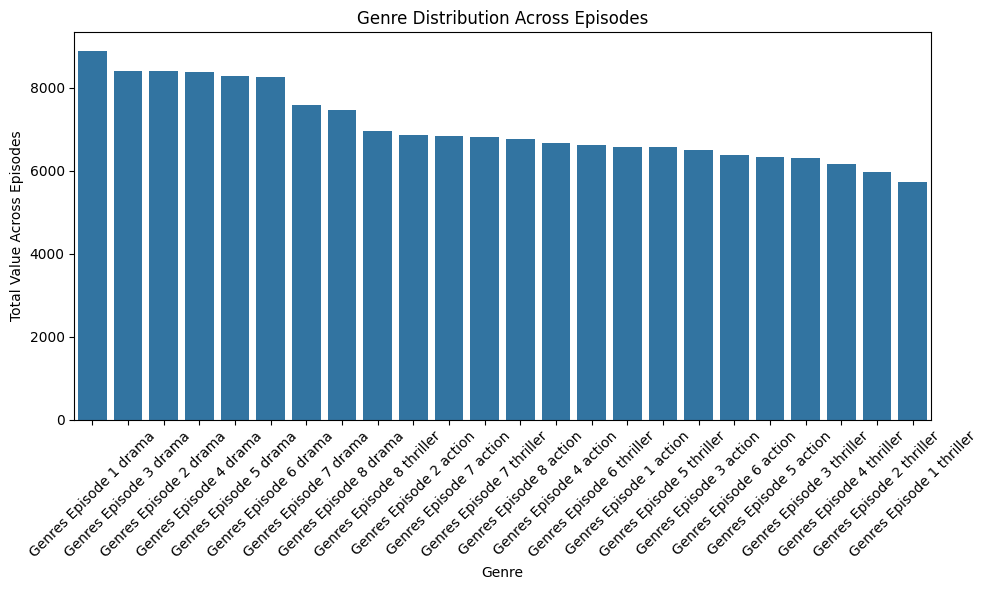

In [19]:
# List of all genre columns (you may adjust this to match your actual column names)
genre_columns = [col for col in training_set.columns if any(genre in col for genre in ['drama', 'action', 'thriller'])]

# Summing the values for each genre across episodes (sum across rows for each genre column)
genre_sums = training_set[genre_columns].sum()

# Sort the genre sums in descending order for better visualization
genre_sums_sorted = genre_sums.sort_values(ascending=False)

# Plot the genre distribution (bar plot)
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_sums_sorted.index, y=genre_sums_sorted.values)
plt.title('Genre Distribution Across Episodes')
plt.xlabel('Genre')
plt.ylabel('Total Value Across Episodes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


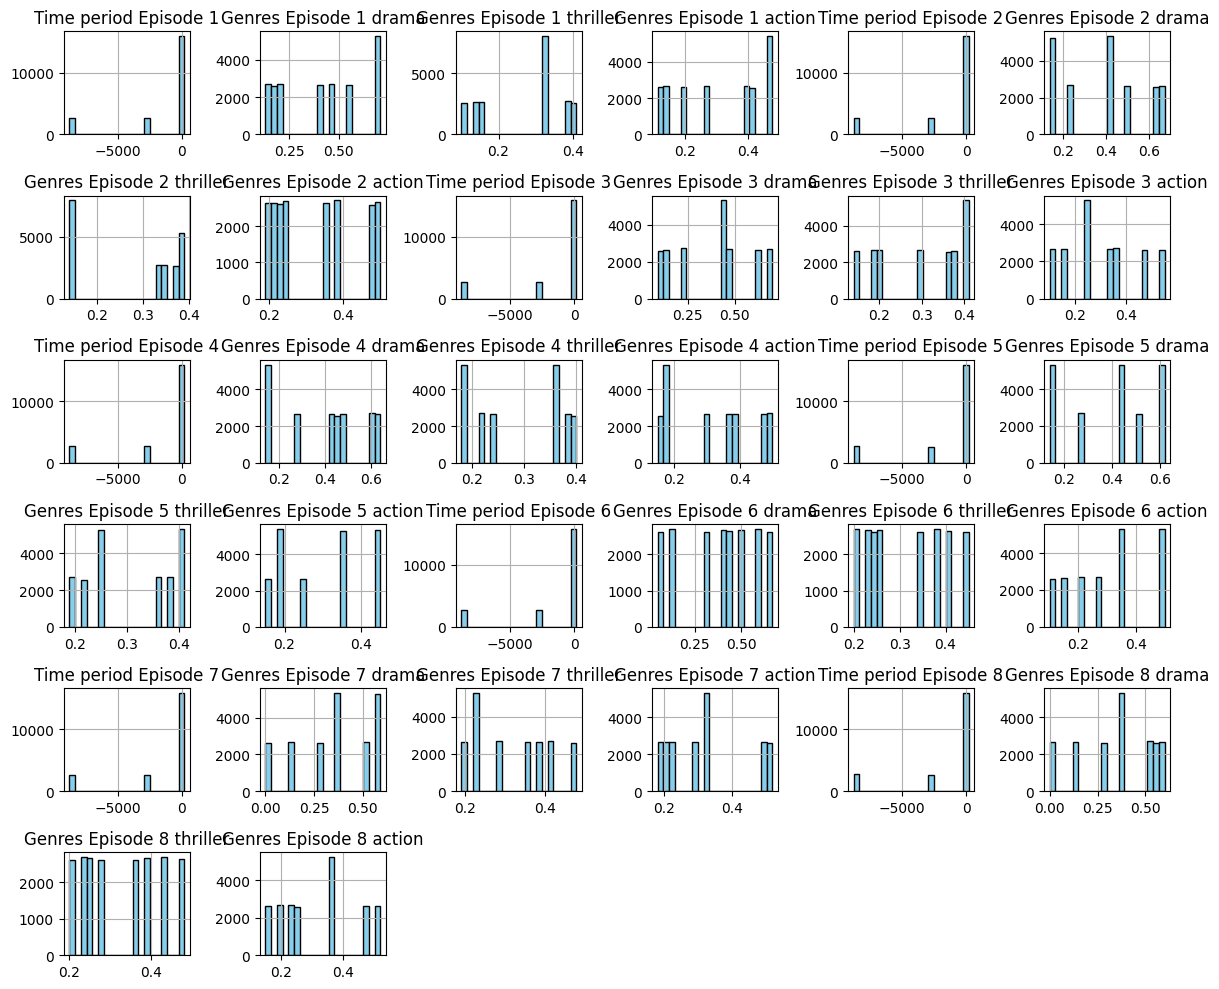

In [20]:
# Histogram for all numerical features
training_set.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()


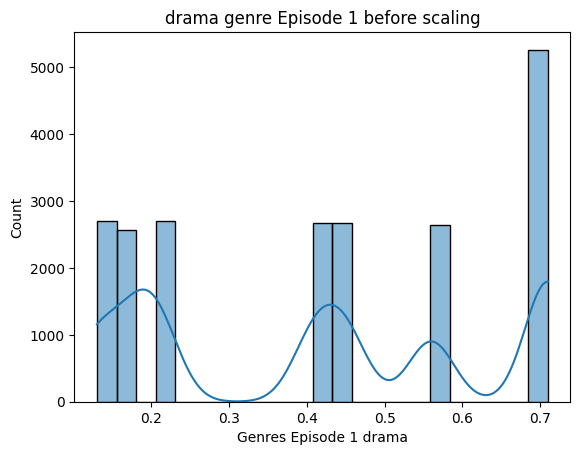

In [22]:
# Drama Genre feature before scaling:

sns.histplot(training_set['Genres Episode 1 drama'], kde=True)
plt.title('drama genre Episode 1 before scaling')
plt.show()

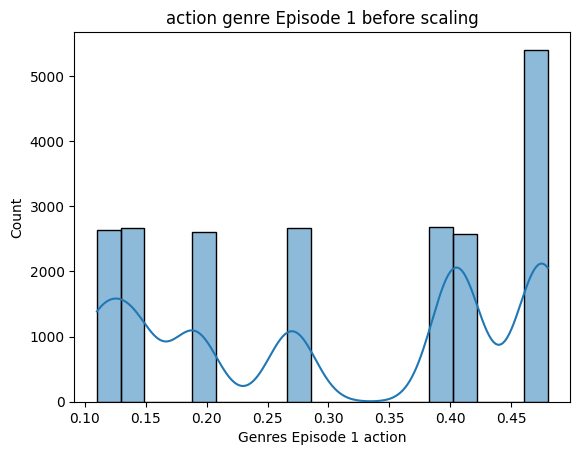

In [23]:
# Action Genre feature before scaling:

sns.histplot(training_set['Genres Episode 1 action'], kde=True)
plt.title('action genre Episode 1 before scaling')
plt.show()

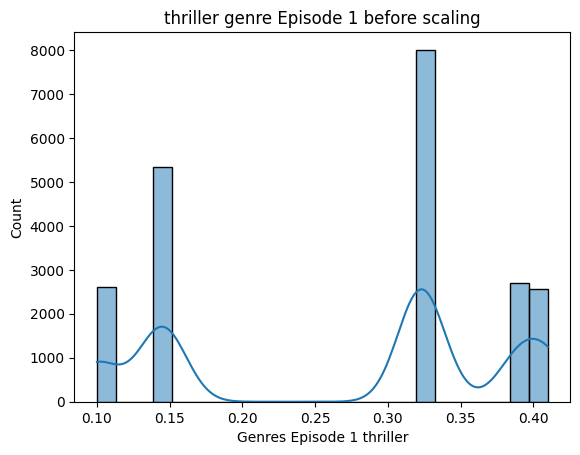

In [24]:
# thriller Genre feature before scaling:

sns.histplot(training_set['Genres Episode 1 thriller'], kde=True)
plt.title('thriller genre Episode 1 before scaling')
plt.show()

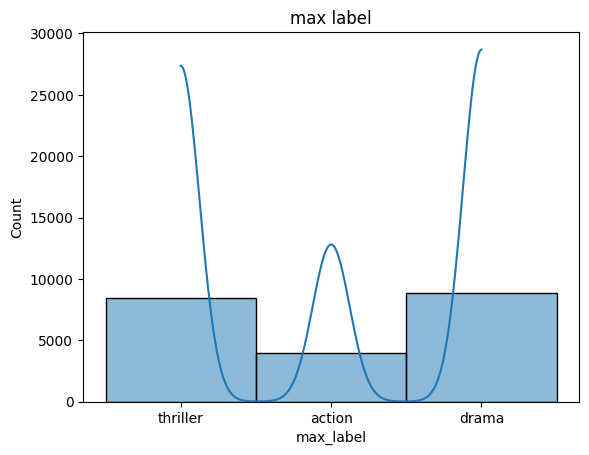

In [25]:
# max label:

sns.histplot(training_set['max_label'], kde=True)
plt.title('max label')
plt.show()

# Encoding Features

In [26]:
# Encoding episode names

ordinal_encoder = OrdinalEncoder()

episode_columns = [col for col in data.columns if col.startswith("Episode")]


# Fit and transform the 'Episode' feature
for col in episode_columns:  
    training_set[col] = ordinal_encoder.fit_transform(training_set[[col]])
    
    validation_set[col] = ordinal_encoder.transform(validation_set[[col]])
    test_set[col] = ordinal_encoder.transform(test_set[[col]])



# Scaling the features

In [29]:
# Scaling time period columns
robust_scaler = RobustScaler()

for i in range(1, 9):
    time_period_column = f'Time period Episode {i}'
    training_set[time_period_column] = robust_scaler.fit_transform(training_set[[time_period_column]])
    
    validation_set[time_period_column] = robust_scaler.transform(validation_set[[time_period_column]])
    test_set[time_period_column] = robust_scaler.transform(test_set[[time_period_column]])


# Define the final columns

In [33]:
# Final columns for classification

X_train = training_set.drop(columns=['max_label'])
y_train = training_set['max_label']

X_validation = validation_set.drop(columns=['max_label'])
y_validation = validation_set['max_label']

X_test = test_set.drop(columns=['max_label'])
y_test = test_set['max_label']


# Model Selection

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# List of models to test
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Dictionary to store results
results = {}

# Iterate over models
for model_name, model in models.items():
    print(f"\nTraining and evaluating {model_name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on validation set
    val_preds = model.predict(X_validation)
    
    # Evaluate the model
    val_accuracy = accuracy_score(y_validation, val_preds)
    val_precision = precision_score(y_validation, val_preds, average='weighted')
    val_recall = recall_score(y_validation, val_preds, average='weighted')
    val_f1 = f1_score(y_validation, val_preds, average='weighted')
    
    # Store results
    results[model_name] = {
        "Accuracy": val_accuracy,
        "Precision": val_precision,
        "Recall": val_recall,
        "F1-Score": val_f1
    }
    
    # Print results
    print(f"Accuracy: {val_accuracy:.4f}")
    print(f"Precision: {val_precision:.4f}")
    print(f"Recall: {val_recall:.4f}")
    print(f"F1-Score: {val_f1:.4f}")

# Find the best model
best_model_name = max(results, key=lambda name: results[name]["Accuracy"])
best_model_accuracy = results[best_model_name]["Accuracy"]

print(f"\nBest Model: {best_model_name}")
print(f"Accuracy: {best_model_accuracy:.4f}")



Training and evaluating K-Nearest Neighbors...
Accuracy: 0.7814
Precision: 0.7842
Recall: 0.7814
F1-Score: 0.7815

Training and evaluating Logistic Regression...


c:\Users\ysh6\anaconda3\envs\Trial\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7720
Precision: 0.7665
Recall: 0.7720
F1-Score: 0.7680

Training and evaluating Random Forest...
Accuracy: 0.9864
Precision: 0.9866
Recall: 0.9864
F1-Score: 0.9864

Best Model: Random Forest
Accuracy: 0.9864


## Random Forest as the selected model for classification

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the validation set
rf_val_preds = rf_model.predict(X_validation)

# Evaluate the model
val_accuracy = accuracy_score(y_validation, rf_val_preds)
print(f"Accuracy on Validation Set: {val_accuracy:.4f}")

# Classification report
print("Classification Report on Validation Set:")
print(classification_report(y_validation, rf_val_preds))

# Predict on the test set
rf_test_preds = rf_model.predict(X_test)

# Evaluate the model
test_accuracy = accuracy_score(y_test, rf_test_preds)
print(f"Accuracy on Test Set: {test_accuracy:.4f}")
print("Classification Report on Test Set:")
print(classification_report(y_test, rf_test_preds))


Accuracy on Validation Set: 0.9864
Classification Report on Validation Set:
              precision    recall  f1-score   support

      action       0.95      0.98      0.96       845
       drama       1.00      1.00      1.00      1895
    thriller       0.99      0.98      0.98      1808

    accuracy                           0.99      4548
   macro avg       0.98      0.98      0.98      4548
weighted avg       0.99      0.99      0.99      4548

Accuracy on Test Set: 0.9908
Classification Report on Test Set:
              precision    recall  f1-score   support

      action       0.97      0.98      0.98       846
       drama       1.00      1.00      1.00      1895
    thriller       0.99      0.99      0.99      1807

    accuracy                           0.99      4548
   macro avg       0.99      0.99      0.99      4548
weighted avg       0.99      0.99      0.99      4548



In [36]:
# Evaluate the model on the training set
rf_train_preds = rf_model.predict(X_train)
train_accuracy = accuracy_score(y_train, rf_train_preds)
print(f"Accuracy on Training Set: {train_accuracy:.4f}")

# Evaluate the model on the validation set 
val_accuracy = accuracy_score(y_validation, rf_val_preds)
print(f"Accuracy on Validation Set: {val_accuracy:.4f}")

# Evaluate the model on the test set 
test_accuracy = accuracy_score(y_test, rf_test_preds)
print(f"Accuracy on Test Set: {test_accuracy:.4f}")

# Check for overfitting
print("\nOverfitting Analysis:")
if train_accuracy - val_accuracy > 0.05:
    print("Warning: Possible overfitting detected! Significant accuracy difference between training and validation sets.")
else:
    print("No significant overfitting detected. Model is generalizing well.")


Accuracy on Training Set: 1.0000
Accuracy on Validation Set: 0.9864
Accuracy on Test Set: 0.9908

Overfitting Analysis:
No significant overfitting detected. Model is generalizing well.


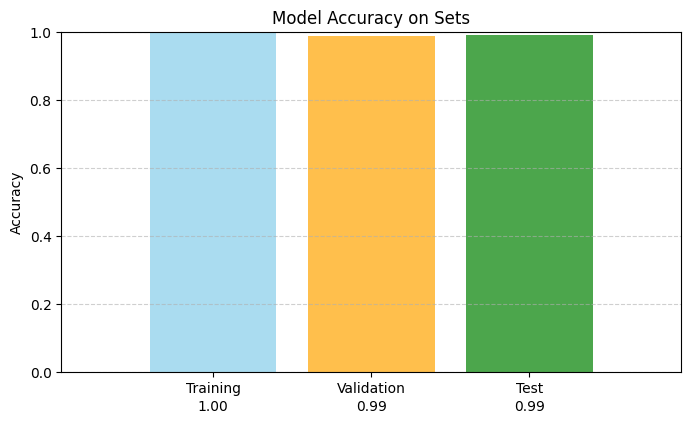

In [48]:
# Create a bar plot
accuracy_scores = [train_accuracy, val_accuracy, test_accuracy]
labels = ['Training', 'Validation', 'Test']

plt.figure(figsize=(8, 5))
plt.bar(labels, accuracy_scores, color=['skyblue', 'orange', 'green'], alpha=0.7)
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy on Sets')

# Add value annotations below the x-axis with spacing
for i, score in enumerate(accuracy_scores):
    plt.text(i, -0.08, f"{score:.2f}", ha='center', va='top', fontsize=10)  # Adjusted y-coordinate for extra spacing

# Increase margin between x-axis and its labels
plt.gca().margins(x=0.2)  # Add horizontal margins
plt.subplots_adjust(bottom=0.2)  # Add margin at the bottom of the plot

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [50]:
# Select a single example or a small subset from the test set
example_index = 2  # You can change the index to test other samples
example_data = X_test.iloc[example_index:example_index+1]
example_true_label = y_test.iloc[example_index]

# Predict using the model
example_prediction = rf_model.predict(example_data)

# Print the input, true label, and predicted label

print("\nTrue Label:")
print(example_true_label)

print("\nPredicted Label:")
print(example_prediction[0])  # Since it's an array, we take the first element



True Label:
drama

Predicted Label:
drama


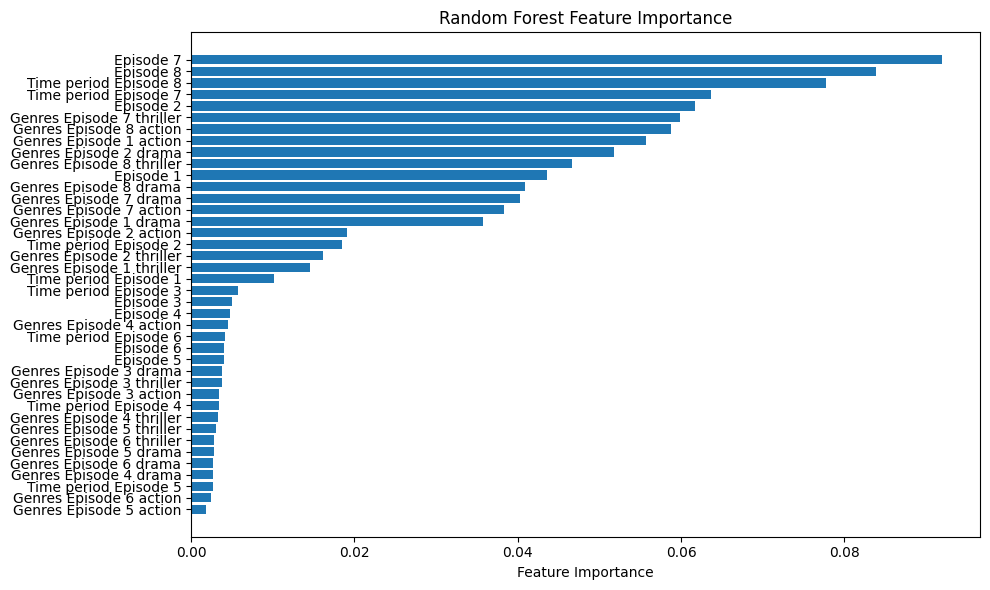

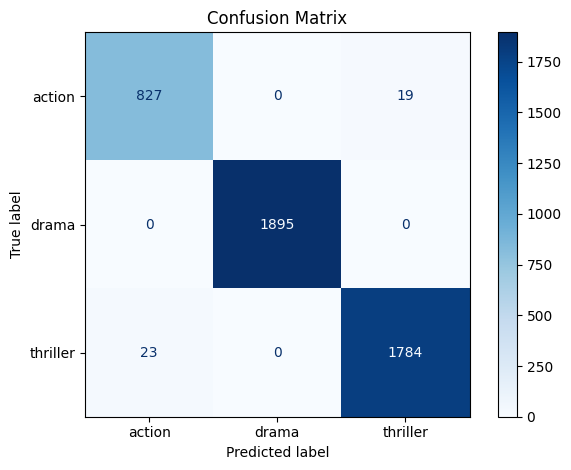

C:\Users\ysh6\AppData\Local\Temp\ipykernel_7996\2846523512.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracies, y=model_names, palette="viridis")


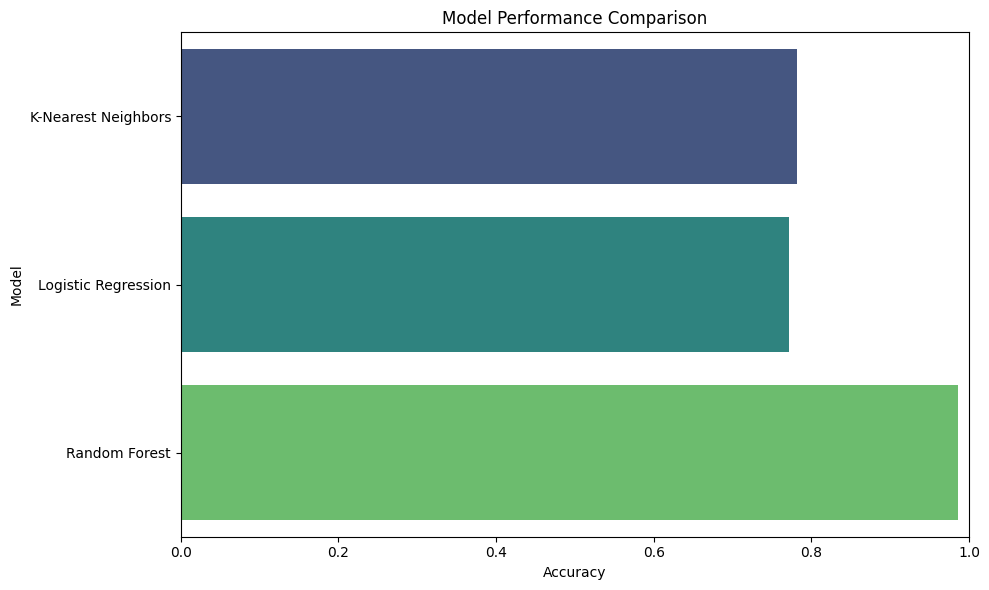

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot feature importance for the Random Forest model
def plot_feature_importance(model, feature_names):
    """Plots feature importance for the Random Forest model."""
    feature_importances = model.feature_importances_
    sorted_idx = feature_importances.argsort()
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
    plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
    plt.xlabel("Feature Importance")
    plt.title("Random Forest Feature Importance")
    plt.tight_layout()
    plt.show()

plot_feature_importance(rf_model, X_train.columns)


genre_labels = ["Action", "Drama", "Thriller"]  # Replace with your actual genre labels


# Confusion matrix for the test set
def plot_confusion_matrix(true_labels, predicted_labels, class_names):
    """Plots the confusion matrix for the test set."""
    cm = confusion_matrix(true_labels, predicted_labels, labels=class_names)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues, values_format="d")
    plt.title("Confusion Matrix")
    plt.tight_layout()
    plt.show()

plot_confusion_matrix(y_test, rf_test_preds, class_names=rf_model.classes_)

# Plot comparison of model performance
def plot_model_comparison(results):
    """Plots a bar chart comparing model performance."""
    model_names = list(results.keys())
    accuracies = [metrics["Accuracy"] for metrics in results.values()]  # Adjusted to use structured results
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=accuracies, y=model_names, palette="viridis")
    plt.xlabel("Accuracy")
    plt.ylabel("Model")
    plt.title("Model Performance Comparison")
    plt.xlim(0, 1)  # Accuracy range is between 0 and 1
    plt.tight_layout()
    plt.show()

plot_model_comparison(results)
